In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sun Apr 30 02:12:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet'

Cloning into '/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.17 MiB | 14.70 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


In [4]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package g++-5 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gcc-10-test-results gcc-9-test-results gcc-8-test-results gcc-7-test-results

Package gcc-5 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'gcc-5' has no installation candidate
E: Package 'g++-5' has no installation candidate


In [5]:
%cd /content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet
!cat Makefile

/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet
GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)
# set ZED_CAMERA=1 to enable ZED SDK 3.0 and above
# set ZED_CAMERA_v2_8=1 to enable ZED SDK 2.X

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# GeForce RTX 3070, 3080, 3090
# ARCH= -gencode arch=compute_86,code=[sm_86,compute_86]

# Kepler GeForce GTX 770, GTX 760, GT 740
# ARCH= -gencode arch=compute_30,code=sm_30

# Tesla A100 (GA100), DGX-A100, RTX 3080
# ARCH= -gencode arch=compute_80,code=[

In [6]:
%cd /content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

nvcc -gencode arch=compute_35,code=sm_35 -gencode arch=compute_50,code=[sm_50,compute_50] -gencode arch=compute_52,code=[sm_52,compute_52] -gencode arch=compute_61,code=[sm_61,compute_61] -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ --compiler-options "-Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU" -c ./src/dropout_layer_kernels.cu -o obj/dropout_layer_kernels.o
nvcc warning : The 'compute_35', 'compute_37', 'sm_35', and 'sm_37' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
nvcc error   : 'gcc' died due to signal 2 
make: *** [Makefile:185: obj/dropout_layer_kernels.o] Interrupt
^C


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2023-03-12 01:23:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.4’

yolov3.weights.4    100%[===================>] 236.52M  56.8MB/s    in 4.4s    

2023-03-12 01:23:20 (53.4 MB/s) - ‘yolov3.weights.4’ saved [248007048/248007048]



In [ ]:
!chmod a+x ./darknet

In [ ]:
!pwd

/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libvorbis-dev is already the newest version (1.3.6-2ubuntu1).
libvorbis-dev set to manually installed.
libdc1394-22 is already the newest version (2.2.5-2.1).
libdc1394-22 set to manually installed.
libdc1394-22-dev is already the newest version (2.2.5-2.1).
libdc1394-22-dev set to manually installed.
libtbb-dev is already the newest version (2020.1-2).
libtbb-dev set to manually installed.
unzip is already the newest version (6.0-25ubuntu1.1).
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
libavcodec-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libswscale-de

**`DETECTION OF VIDEO USING YOLOV3`**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving vehicle-video-slowed.mp4 to vehicle-video-slowed.mp4


In [ ]:
%cd /content/drive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet

/content/drive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet


In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights
  -dont_show vehicle-video-slowed.mp4 -i 0 -out_filename vehicle_video_output-slowed.avi

In [ ]:
from google.colab import files
files.download('vehicle_video_output-slowed.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show vehicle-video1-slowed.mp4 -i 0 -out_filename vehicle_video_output1.avi -thresh 0.7

In [ ]:
from google.colab import files
files.download('vehicle_video_output1.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

** DETECTION OF SINGLE IMAGE USING YOLOV3**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Frame_84.jpg to Frame_84.jpg


In [ ]:
#!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show vehicle_video1.mp4 -i 0 -out_filename vehicle_video_output1.avi -thresh 0.7
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show Frame_83.jpg -i 0 -out_filename vehicle_Frame83_output1.jpg -thresh 0.7

In [ ]:
!ls -l

In [ ]:
%cd /content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet
#!ls -l

/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet


In [ ]:
!chmod +rwx data/Frame_54.jpg

In [ ]:
!cat /content/gdrive/MyDrive/\ MAJOR\ PROJECT\ B\ TECH\ 4th\ YEAR/Darknet/data/train.txt

/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet/data/Frame_53.jpg

In [ ]:
#!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output Frame_83.jpg
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output < /content/gdrive/MyDrive/\ MAJOR\ PROJECT\ B\ TECH\ 4th\ YEAR/Darknet/data/train.txt > result.txt

 CUDA-version: 11080 (12000), GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv   

In [ ]:
#using regular expressions find the specific pattern from which we can extract co ordintes from results.txt file    
import re 
def retrieve():
    pattern = r"^/content/gdrive/MyDrive/" 
    textfile = open('result.txt', 'r') 
    flag = False
    result = []
    for line in textfile: 
        if flag:
            result.append(f'{line}'.split("\t"))  
            #print(f'{line}') 
        if re.match(pattern,line): 
            flag = True 
    textfile.close() 
    return result       

In [ ]:
#result = {} 
result[4] = retrieve()  

In [ ]:
print(result)

{1: [['person: 50%', '(left_x:   -0   top_y:  212   width:  137   height:   78)\n'], ['car: 90%', '(left_x:    2   top_y:  161   width:  149   height:   59)\n']], 2: [['person: 97%', '(left_x:  135   top_y:  188   width:  276   height:  130)\n'], ['motorbike: 25%', '(left_x:  146   top_y:  207   width:  324   height:  129)\n']], 3: [['person: 88%', '(left_x:   61   top_y:  206   width:  239   height:   84)\n'], ['truck: 30%', '(left_x:  151   top_y:   33   width:  393   height:  204)\n']], 4: [['person: 79%', '(left_x:    3   top_y:  206   width:  201   height:   82)\n'], ['truck: 71%', '(left_x:  101   top_y:   91   width:  334   height:  142)\n']]}


In [ ]:
!sed -i 's|/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet/data/Frame_53.jpg|/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet/data/Frame_54.jpg|g' data/train.txt

In [ ]:
!cat data/train.txt

/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet/data/Frame_54.jpg

In [ ]:
!sudo apt install dos2unix

GENERATE SPEED FROM FETCHED COORDINATES VALUES  

In [ ]:
#result dictionary will store the co ordinates values with its respective class and probabilities
print(result)

{1: [['person: 50%', '(left_x:   -0   top_y:  212   width:  137   height:   78)\n'], ['car: 90%', '(left_x:    2   top_y:  161   width:  149   height:   59)\n']], 2: [['person: 97%', '(left_x:  135   top_y:  188   width:  276   height:  130)\n'], ['motorbike: 25%', '(left_x:  146   top_y:  207   width:  324   height:  129)\n']], 3: [['person: 88%', '(left_x:   61   top_y:  206   width:  239   height:   84)\n'], ['truck: 30%', '(left_x:  151   top_y:   33   width:  393   height:  204)\n']], 4: [['person: 79%', '(left_x:    3   top_y:  206   width:  201   height:   82)\n'], ['truck: 71%', '(left_x:  101   top_y:   91   width:  334   height:  142)\n']]}


In [ ]:
#now use eucledian distance formula to calculate speeds between the vehicles in consecutive frames 
'''example l = ['(left_x:', '', '151', '', '', 'top_y:', '', '', '33', '', '', 'width:', '', '393', '', '', 'height:', '', '204)\n'] 
   so positions of x,y,width,height are at indexes 2,8,13,18 respectively and l[18] = l[18[:3]]'''
l = result[3][1][1].split(" ")
k = result[4][1][1].split(" ")
x1,y1,w1,h1 = int(l[2]),int(l[8]),int(l[13]),int(l[18][:3]) 
x2,y2,w2,h2 = int(k[2]),int(k[8]),int(k[13]),int(k[18][:3])

# calculating eucledian distance between truck from frame 53 and frame 54 where d = ((x2 - x1)^2 + (y2 - y1)^2)^0.5
speed = pow(pow(x2 - x1,2) + pow(y2 - y1,2),0.5)   
print(speed)  

76.57675887630658


In [ ]:
from google.colab import files
files.download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

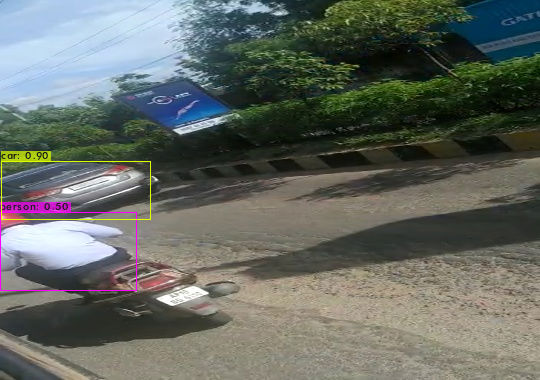

In [ ]:
image = cv2.imread('predictions.jpg')
image.shape
cv2_imshow(image)

In [ ]:
image.shape

(380, 540, 3)

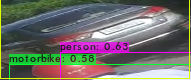

In [ ]:
#the cropped image showuld be informat of img[top_y:(top_y+height) , top_x:(top_x+width)]
cropped_car = image[152:232,8:199]
cv2_imshow(cropped_car)
#cv2_imshow(cv2.rectangle(image, (8, 198), (79, 231), (0, 255, 0), 1))

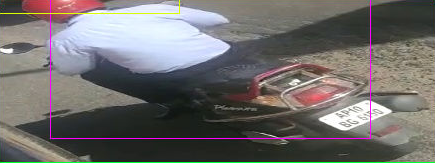

In [ ]:
cropped_bike = image[217:389,18:453]
cv2_imshow(cropped_bike)

In [ ]:
uploaded = files.upload()

Saving Frame_53.jpg to Frame_53.jpg


In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output Frame_53.jpg

 CUDA-version: 11020 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 1

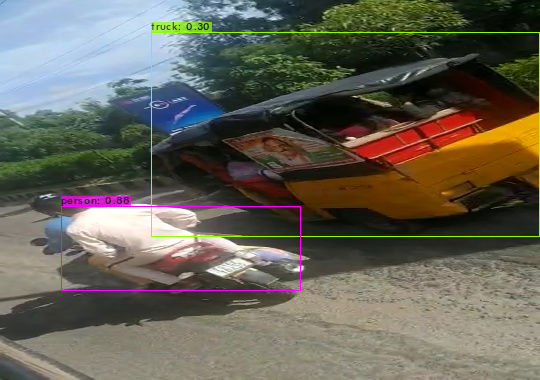

In [ ]:
image = cv2.imread('predictions.jpg')
image.shape
cv2_imshow(image)

In [ ]:
import sys    
path_to_module = '/content/darknet/darknet.py'
sys.path.append(path_to_module)
print(sys.path)
import darknet

['/content', '/env/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython', '/content/darknet/darknet.py', '/content/darknet/darknet.py', '/content/darknet/darknet.py']


ModuleNotFoundError: ignored

** DETECTION OF OBJECTS IN MULTIPLE IMAGE FRAMES USING YOLOV3**

In [ ]:
#!./darknet imtest predictions.jpg
%cd /content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet

/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Darknet


In [ ]:
import cv2
import numpy as np 
import os
from google.colab.patches import cv2_imshow

In [ ]:
def Test_in_Frames(inp_file_path,out_file_path):
    c = 0
    for img in  os.listdir(inp_file_path):
       c += 1
       #k = cv2_imshow(img)
       print(img)
       while(c > 10):
         break
       '''!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output img 
       path_of_file = out_file_path + "/"+str(img)
       image_output = cv2.imread("predictions.jpg")
       cv2.imwrite(path_of_file,image_output)
       c += 1''' 

In [ ]:
folder_dir,output_folder_dir = "/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/Frames_Folder","/content/gdrive/MyDrive/ MAJOR PROJECT B TECH 4th YEAR/OUTPUT_FRAMES"
Test_in_Frames(folder_dir,output_folder_dir)